# Assignment 3

The assignment 3 contains 3 questions and the due date is April 17th (Friday) 23:59PM.

## Question 1 The “Business Decision”

We consider the core decision of an MBA admissions committee: *which applicants should we accept in the MBA program?* The school is interested in predicting the MBA participant’s success in the future before offering admission. 

To make this decision, the committee uses a number of data about the applicants. Let us consider for example the following attributes in evaluating an MBA application (of course in practice many more can be considered):

1. GPA
2. GMAT score
3. Scholarships, fellowships won
4. Evidence of Communications skills (debating competition, personal interview score)
5. Prior Job Experience
6. Organizational Experience
7. Other extra curricular achievements

Let us assume that this data is converted into a numerical scale from 1-7. For example: a numerical rating may be given to the fellowships based on the prestige and the number of fellowships won. Job experience may be rated on the number of years on the job, with a numerical weighting for the level of the job in the managerial ladder.

In particular, theory may suggest that there are really one or two basic factors (like intelligence and leadership skills) that lead to success in a management career. The various attributes are really different manifestations of these basic factors. But maybe there are other **hidden derived variables (factors)** in the data we have: instead of us manually combining raw attributes into meaningful derived ones, which not only is difficult with many data but also dangerous as we impose our biases, let’s get factor analysis to do the job for us - and use our intuition and judgment in the process.

### Question 1.1 (10 points)
Read the data from MBAadmin.csv and check the descriptive statistics of the data. **Implement yourself the principal component analysis** and derive 2 principal components and show how much of the variances can be explained by these 2 principal components.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mba = pd.read_csv('MBAadmin.csv')
mba

GPA  GMAT  Fellow  Comm  Job.Ex  Organze  Extra
0   3.0   580     2.0   3.5       5      3.8    4.0
1   3.2   570     2.0   3.8       6      3.8    3.8
2   3.7   690     3.0   3.3       3      3.2    3.6
3   3.9   760     3.0   3.8       5      3.9    3.2
4   2.8   480     2.0   3.2       6      3.8    3.8
5   3.4   520     2.5   2.6       2      2.5    2.4
6   3.6   670     3.0   3.7       4      3.5    2.9
7   3.6   760     3.0   3.9       5      3.3    3.2
8   2.8   380     1.0   2.0       3      2.9    3.1
9   3.6   560     3.0   2.8       2      1.0    2.8
10  2.8   480     2.0   3.2       4      3.4    3.7
11  3.6   590     3.4   3.4       5      3.7    3.6
12  3.8   720     3.8   3.8       6      3.8    3.7
13  3.5   680     3.0   3.6       6      3.4    3.8
14  3.9   700     3.7   3.8       2      2.1    2.7
15  3.3   560     2.8   3.4       5      3.8    2.7
16  2.8   440     1.0   3.3       5      3.5    3.8
17  2.5   430     1.0   3.1       3      3.1    2.9
18  2.5   420     1.0   2.8       2      2.3    2.5
19  3.8   680     2.8   3.7       6      3.2    3.8

In [3]:
mba.describe()

GPA        GMAT     Fellow       Comm     Job.Ex    Organze  \
count  20.000000   20.000000  20.000000  20.000000  20.000000  20.000000   
mean    3.305000  583.500000   2.450000   3.335000   4.250000   3.200000   
std     0.468452  119.440582   0.905248   0.489118   1.517442   0.734847   
min     2.500000  380.000000   1.000000   2.000000   2.000000   1.000000   
25%     2.800000  480.000000   2.000000   3.175000   3.000000   3.050000   
50%     3.450000  575.000000   2.800000   3.400000   5.000000   3.400000   
75%     3.625000  682.500000   3.000000   3.725000   5.250000   3.800000   
max     3.900000  760.000000   3.800000   3.900000   6.000000   3.900000   

           Extra  
count  20.000000  
mean    3.300000  
std     0.515037  
min     2.400000  
25%     2.875000  
50%     3.400000  
75%     3.800000  
max     4.000000

In [4]:
# The first step is to subtract the mean of each feature from every entry
mba_centered = mba - mba.mean(axis=0) 

# According to the table below, the mean of each feature will be 0 (or very close to it)
mba_centered.describe()

GPA        GMAT        Fellow          Comm     Job.Ex  \
count  2.000000e+01   20.000000  2.000000e+01  2.000000e+01  20.000000   
mean   2.442491e-16    0.000000  2.220446e-16  4.440892e-16   0.000000   
std    4.684521e-01  119.440582  9.052479e-01  4.891184e-01   1.517442   
min   -8.050000e-01 -203.500000 -1.450000e+00 -1.335000e+00  -2.250000   
25%   -5.050000e-01 -103.500000 -4.500000e-01 -1.600000e-01  -1.250000   
50%    1.450000e-01   -8.500000  3.500000e-01  6.500000e-02   0.750000   
75%    3.200000e-01   99.000000  5.500000e-01  3.900000e-01   1.000000   
max    5.950000e-01  176.500000  1.350000e+00  5.650000e-01   1.750000   

            Organze         Extra  
count  2.000000e+01  2.000000e+01  
mean  -2.220446e-16  1.776357e-16  
std    7.348469e-01  5.150370e-01  
min   -2.200000e+00 -9.000000e-01  
25%   -1.500000e-01 -4.250000e-01  
50%    2.000000e-01  1.000000e-01  
75%    6.000000e-01  5.000000e-01  
max    7.000000e-01  7.000000e-01

In [5]:
# The second step is to compute the covariance matrix
mba_covariance_matrix = np.cov(mba_centered.T)
mba_covariance_matrix

array([[ 2.19447368e-01,  5.02447368e+01,  3.91842105e-01,
         1.27184211e-01,  1.09210526e-01, -1.05263158e-02,
         2.63157895e-03],
       [ 5.02447368e+01,  1.42660526e+04,  9.27631579e+01,
         4.56605263e+01,  5.96052632e+01,  1.64736842e+01,
         9.84210526e+00],
       [ 3.91842105e-01,  9.27631579e+01,  8.19473684e-01,
         2.59210526e-01,  2.50000000e-01,  7.36842105e-03,
         1.00000000e-02],
       [ 1.27184211e-01,  4.56605263e+01,  2.59210526e-01,
         2.39236842e-01,  4.43421053e-01,  1.70526316e-01,
         9.84210526e-02],
       [ 1.09210526e-01,  5.96052632e+01,  2.50000000e-01,
         4.43421053e-01,  2.30263158e+00,  8.94736842e-01,
         6.00000000e-01],
       [-1.05263158e-02,  1.64736842e+01,  7.36842105e-03,
         1.70526316e-01,  8.94736842e-01,  5.40000000e-01,
         2.31052632e-01],
       [ 2.63157895e-03,  9.84210526e+00,  1.00000000e-02,
         9.84210526e-02,  6.00000000e-01,  2.31052632e-01,
         2.6526315

In [6]:
# The third step is to compute the eigenvectors and eigenvalues from the covariance matrix
eigenvalue, eigenvector = np.linalg.eig(mba_covariance_matrix)

print(f'Eigenvectors: {eigenvector}')
print('\n')
print(f'Eigenvalues: {eigenvalue}')

Eigenvectors: [[ 3.52182669e-03 -5.09143931e-02  2.82598927e-01  9.25183466e-01
  -4.98958876e-02 -2.38496315e-01  4.68895552e-02]
 [ 9.99957901e-01 -3.98033844e-03 -6.68762886e-03 -2.60590696e-03
   2.74833430e-03 -3.03809934e-03 -2.32911014e-04]
 [ 6.50215184e-03 -7.48307220e-02  8.31162755e-01 -2.32935386e-01
  -4.18531936e-01  2.17153225e-01  1.64143720e-01]
 [ 3.20058937e-03  1.13869857e-01 -1.18804656e-01  2.90049368e-01
  -2.71225868e-03  9.27484681e-01 -1.68952774e-01]
 [ 4.17860740e-03  8.77815403e-01  2.60315362e-01 -3.61033596e-02
   1.85782369e-01 -1.23205310e-01 -3.32656700e-01]
 [ 1.15495732e-03  3.82623391e-01 -3.82569433e-01  6.40419888e-02
  -7.84171369e-01 -6.55353757e-02  2.89685412e-01]
 [ 6.90044307e-04  2.48727479e-01  3.19936159e-02  1.53754675e-02
   4.15796446e-01  1.27485244e-01  8.64716715e-01]]


Eigenvalues: [1.42672538e+04 2.62224187e+00 2.44559826e-01 1.41974479e-02
 1.51626763e-01 6.02302398e-02 9.20070444e-02]


In [7]:
# The fourth step is to pick (in our case) the 2 principal components from the top 2 eigenvectors
principal_components = eigenvector[:,:2].T
principal_components.shape

(2, 7)

In [8]:
# The fifth step is to derive the new dataset, by multiplying the dataset from where the mean was subtracted
# by the transposed of the matrix with the 2 principal components (in our case)

subspace = mba_centered.dot(principal_components.T)
subspace

0         1
0    -3.499015  1.143967
1   -13.492889  2.035819
2   106.495356 -1.511811
3   176.503603  0.180294
4  -103.492429  2.346093
5   -63.509851 -2.306297
6    86.501168 -0.563071
7   176.502173 -0.022619
8  -203.512620 -0.469603
9   -23.508396 -2.964779
10 -103.501317  0.412540
11    6.511069  0.819712
12  136.514545  1.248651
13   96.508937  1.332053
14  116.495721 -3.079799
15  -23.493132  0.813702
16 -143.501452  1.598922
17 -153.512168 -0.501309
18 -163.518086 -1.779072
19   96.508782  1.266607

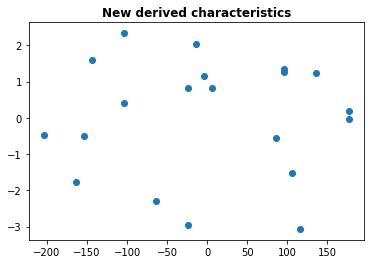

In [9]:
# In order to have a better idea of the new derived characteristics, as there are only 2, the best way to do
# so is through a scatter plot

plt.scatter(subspace[0], subspace[1])
plt.title('New derived characteristics', fontweight='bold')
plt.show()

In [10]:
print("The 2 principal components identified explain {0:1.5f} of the total variance.".
      format(np.sum(eigenvalue[:2])/np.sum(eigenvalue)))

The 2 principal components identified explain 0.99996 of the total variance.


### Question 1.2 (10 points)

Now use the sklearn.decomposition.PCA to perform principal component analysis on the data and explain which number of principal components should be chosen using Elbow method. 

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(mba)

pca.explained_variance_ratio_

array([9.99776821e-01, 1.83753417e-04, 1.71375129e-05, 1.06252349e-05,
       6.44738725e-06, 4.22062988e-06, 9.94885178e-07])

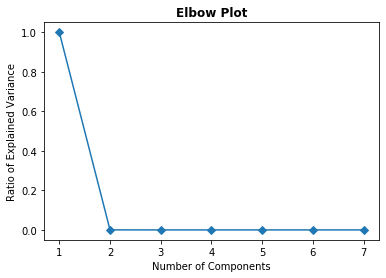

In [12]:
# Elbow plot
plt.plot(range(1,8), pca.explained_variance_ratio_, marker='D')
plt.title('Elbow Plot', fontweight='bold')
plt.ylabel('Ratio of Explained Variance')
plt.xlabel('Number of Components')
plt.show()

- Looking at the elbow plot, the unexplained variance after considering the top principal component is about 0.02%, meaning that such component explains the large majority of the variance. With this result, reducing the original space into a single dimension based on this component would not leave much of the variance left unexplained;

- Further analyzing the array with the explained variances, as it is very difficult to see in the plot, the top 2 principal component explains 10 times more variance than the following 2 components;

- All in all, reducing the space to only 1 or 2 dimensions would be advisable.

## Question 2 Customer Segmentation

The management team of a large shopping mall would like to understand the types of people who are, or could be, visiting their mall. They have good reasons to believe that there are a few different market segments, and they are considering designing and positioning the shopping mall services better in order to attract mainly a few profitable market segments, or to differentiate their services (e.g. invitations to events, discounts, etc) across market segments.

We aim to describe attitudes of people to shopping in a shopping mall using a small dataset. To make these decisions, the management team run a market research survey of a few potential customers. In this case this was a small survey to only a few people, where each person answered six attitudinal questions and a question regarding how often they visit the mall, all on a scale 1-7, as well as one question regarding their household income:

| Name        | Name           | Name  |
| ------------- |:-------------:| -----:|
| V1     | Shopping is fun | 1-7 |
| V2      | Shopping is bad for your budget      |  1-7 |
| V3 | I combine shopping with eating out      |    1-7 |
| V4     | I try to get the best buys while shopping | 1-7 |
| V5      | I don’t care about shopping      |  1-7 |
| V6 | You can save lot of money by comparing prices      |    1-7 |
| Income      | The household income of the respondent      |  Dollars |
| Mall.Visits | How often they visit the mall      |    1-7 |


### Question 2.1 (10 points) 

Perform customer segmentation using k-Means algorithm by setting k=1. What can we infer from customer segmentation with one cluster? Explain this using the obtained centroid of cluster.

In [13]:
mall = pd.read_csv('Mall_Visits.csv')
mall.describe()

# Looking at the table produced from the describe function, we can see that there is at least one observation
# in the Mall.Visits with a value of 0, which may mean that there is an error on the collection of the data.
# In any case, I will proceed with the analysis without changing the data, but the results may not be right.
# Garbage in, garbage out

ID         V1         V2         V3         V4       V5  \
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.0000   
mean   20.500000   3.850000   4.100000   3.950000   4.100000   3.4500   
std    11.690452   1.874936   1.392286   1.986493   1.498717   1.7387   
min     1.000000   1.000000   2.000000   1.000000   2.000000   1.0000   
25%    10.750000   2.000000   3.000000   2.000000   3.000000   2.0000   
50%    20.500000   4.000000   4.000000   4.000000   4.000000   3.5000   
75%    30.250000   5.250000   5.000000   6.000000   5.250000   4.2500   
max    40.000000   7.000000   7.000000   7.000000   7.000000   7.0000   

              V6       Income  Mall.Visits  
count  40.000000     40.00000     40.00000  
mean    4.350000  46000.00000      3.25000  
std     1.477177  17216.56924      1.94475  
min     2.000000  25000.00000      0.00000  
25%     3.000000  30000.00000      2.00000  
50%     4.000000  42500.00000      3.00000  
75%     5.250000  60000.00000      4.25000  
max     7.000000  80000.00000      7.00000

In [14]:
from sklearn.cluster import KMeans

customer_segment = KMeans(n_clusters=1)
customer_segment.fit(mall)

cluster_center = []
for var in range(len(customer_segment.cluster_centers_[0])):
    cluster_center.append(customer_segment.cluster_centers_[0][var])
    
mean_values = []
statistics = mall.describe()
for variable in statistics:
    mean_values.append(statistics[variable]['mean'])
    
cluster_center == mean_values

True

- When we define the number of clusters to be only 1, all the customers are clustered into a single segment, meaning that everyone is in the same group. Doing this or not doing anything is virtually the same thing, because the results obtained are the same as if we just considered the entire dataset without modifying it.

- When we look at the mean row from the mall.describe() dataframe, we see that it has exactly the same values as the ones obtained when we look at the centroid of the cluster.

### Question 2.2 (10 points)

Now perform customer segmentation by setting the number of k to be 3. Explain the obtained clusters. Check the distribution of each feature across the clusters and see whether these features are statisically significantly different from each other. 

In [15]:
customer_segment2 = KMeans(n_clusters=3, random_state=20)
customer_segment2.fit(mall.iloc[:,1:]) # fit everything but the ID

mall_2 = mall.copy() # Create a copy of the dataset

# Create a segment column in the new dataset with the labels from the identified clusters
mall_2['segment'] = customer_segment2.labels_

# Check how many customers are in each segment
mall_2['segment'].value_counts()

1    20
0    12
2     8
Name: segment, dtype: int64

In [16]:
cluster_center0, cluster_center1, cluster_center2 = [], [], []
for var in range(len(customer_segment2.cluster_centers_[0])):
    cluster_center0.append(round(customer_segment2.cluster_centers_[0][var], 2))
    cluster_center1.append(round(customer_segment2.cluster_centers_[1][var], 2))
    cluster_center2.append(round(customer_segment2.cluster_centers_[2][var], 2))

segments = pd.DataFrame()
segments[0] = cluster_center0
segments[1] = cluster_center1
segments[2] = cluster_center2

columns = {}
i = 0
for column in mall.iloc[:,1:]:
    columns[i] = column
    i += 1

segments.rename(columns)

0        1         2
V1               5.17      2.8      4.50
V2               3.83      4.6      3.25
V3               5.17      2.6      5.50
V4               3.00      5.2      3.00
V5               2.50      4.2      3.00
V6               3.83      4.9      3.75
Income       54166.67  31000.0  71250.00
Mall.Visits      2.83      3.8      2.50

- Segment 1 accounts for half of the customers. This segment is the one that considers shopping to be the least fun (V1: 2.8 < 4.5 < 5.17) and that dislikes it the most (V5: 4.2 > 3 > 2.5). This segment is the one that believes the most that shopping is bad for their budget (V2: 4.6 > 3.83 > 3.25), it is the one that tries to get the best deals when shopping (V4: 5.2 > 3), and it is the one that believes the most that money can be saved by comparing prices (V6: 4.9 > 3.83 > 3.75). In line with this, it has the lowest income (Income: 31,000 < 54,166.67 < 71,250) but it is the one that goes more times to the mall (Mall.Visits: 3.8 > 2.83 > 2.5). Furthermore, they also are the ones that are least likely to eat out when they go shopping (V3: 2.6 < 5.17 < 5.5).


- Segment 0 accounts for 30% of the customers. As represented in the table above, it is the segment that finds shopping more fun (V1: 5.17 > 4.5 > 2.8) and that likes it the most (V5: 2.5 < 3 < 4.2). Its income level appears to be in the middle and all the other variables either lie in the middle as well or very close to the remaining segment.


- Segment 2, hence, represents the remaining 20% of the customers. It has the highest income (Income: 71,250 > 54,166.67 > 31,000), it is the one that believes the least that shopping is bad for its budget (V2: 3.25 > 3.83 > 4.6) and that comparing prices can help save money (V6: 3.75 < 3.83 < 4.9). It is the one that combines shopping with eating out the most (V3: 5.5 > 5.17 > 2.6) and goes shopping less times (Mall.Visits: 2.5 < 2.83 < 3.8).


- After having identified these customer segments, it is important to test how different they are from each other. In order to perform such test, statistics can be very helpful. As the sample size of the 3 customer segments is smaller than 30, we should perform a 2-sided t-test to find if there are statistically significant differences among the segments.

In [17]:
# The scipy.stats library has several statistics functions that can be used and the ttest_ind is the one that
# allows for the performance of the t-test of "two independent samples of scores"
from scipy.stats import ttest_ind

# In order to assess if the segments are different from each other, a comparison between segment 0 and the
# other segments will be done as well as between segment 1 and 2.

def t_test(segment_1, segment_2):
    
    '''
This function performs a 2-sided t-test comparing the chosen segments (which are the parameters accepted by
this function) against each other through a 2-sided t-test on all columns but the index. Then, a dataframe will
be generated based on the results from t-test, which will be returned
    '''
    
    t_test_results = {}

    for column in columns.values():
        segment = mall_2.loc[mall_2['segment'] == segment_1][column]
        others = mall_2.loc[mall_2['segment'] == segment_2][column]

        t_test_results[column] = ttest_ind(segment, others)

    results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
    results_df.columns = ['T-Value','P-value']
    
    return results_df

def not_significant(df, threshold=0.05):

    '''
The non_significant function takes as parameters df (a dataframe with the variables as indices and t-value and
p-value as columns) and threshold (arbitrary value to define the significance of the the variable, the default
is 0.05 but it can be different). It returns a list (non_significant) with the variables whose p-value is
bigger than the defined threshold.
    '''
    
    non_significant = []
    
    for index, row in df.iterrows():
        if row['P-value'] > threshold:
            non_significant.append(index)
    
    return non_significant

In [18]:
test_1 = t_test(0,1)
non_significant_1 = not_significant(test_1)

test_2 = t_test(0,2)
non_significant_2 = not_significant(test_2)

test_3 = t_test(1,2)
non_significant_3 = not_significant(test_3)

In [19]:
test_1

T-Value       P-value
V1            4.407756  1.232312e-04
V2           -1.503986  1.430409e-01
V3            4.871207  3.350838e-05
V4           -5.562149  4.766205e-06
V5           -3.134088  3.835779e-03
V6           -1.947939  6.083270e-02
Income       11.446372  1.799364e-12
Mall.Visits  -1.341290  1.898930e-01

In [20]:
non_significant_1

['V2', 'V6', 'Mall.Visits']

## Segment 0 vs Segment 1
- Looking at the dataframe above and the output of the of the not_significant function, segment 0 is statistically different from segment 1 in all variables, except V2, V6 and Mall.Visits, with a significance level of 0.05;
- Such results indicate that they think differently in most of the aspects, except in what regards that shopping is bad for their budgets (V2) and that they can save money by comparing prices (V6). In addition, it can be said that both visit malls regularly;
- Again, apart from that, the remaining aspects are different between the segments.

In [21]:
test_2

T-Value   P-value
V1           0.731993  0.473597
V2           1.622602  0.122058
V3          -0.415277  0.682847
V4           0.000000  1.000000
V5          -0.585540  0.565454
V6           0.289346  0.775623
Income      -6.598234  0.000003
Mall.Visits  0.550598  0.588678

In [22]:
non_significant_2

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'Mall.Visits']

## Segment 0 vs Segment 2
- Considering the above dataframe and the output of the not_significant function, all the variables under study are not statistically different between segments 0 and 2, except for Income.;
- These results make us believe that these segments are similar in everything except their buying power, measured by the Income, in which segment 2 has a significantly higher one (although the correct term would be different, as we are making a two-sided t-test).

In [23]:
test_3

T-Value       P-value
V1           -3.082104  4.817447e-03
V2            2.155099  4.059163e-02
V3           -5.403109  1.163485e-05
V4            4.800794  5.685806e-05
V5            1.901026  6.843773e-02
V6            1.660048  1.089197e-01
Income      -17.158908  1.065245e-15
Mall.Visits   1.439328  1.619894e-01

In [24]:
non_significant_3

['V5', 'V6', 'Mall.Visits']

## Segment 1 vs Segment 2
- Taking into account the dataframe above and the output of the not_significant function, segment 1 and 2 are statistically different from each other in all variables except V5, V6 and Mall.Visits.
- In what concerns not caring about shopping, both segments seem to be similar as well as in the beliefs regarding comparing prices. Furthermore, in terms of the times in which they visit malls, there seems to be a similarity as well.

## Final Remarks
- Apart from the analysis between the individual segments, it appears that the beliefs about comparing prices to save money and the amount of times the segments visit malls, the remaining variables can be considered to be a basis to identify different segments. However, it must be noted that segment 1 is particularly different from the other ones, but the same cannot be said about segment 0 and 2, which are very similar.

### Question 2.3 (10 points)

Now perform customer segmentation by setting the number of k using the Elbow method and Silhouette score, respectively. Explain what would be the k you get from two methods.

In [25]:
# Elbow plot method

# List to store the sum of the squared error from each observation to the center of the closest cluster
squared_errors = []

# Iterating from 2 to up to 15 clusters, fitting everything but the index
for cluster in range(2,16):
    model = KMeans(n_clusters=cluster, random_state=40).fit(mall.iloc[:,1:])
    squared_errors.append(model.inertia_)
    
for error in range(2, 16):
    print(f'''When the number of clusters is {error}, the sum of squared distances of samples to their closest cluster center is {squared_errors[error-2]}.''')

When the number of clusters is 2, the sum of squared distances of samples to their closest cluster center is 2347475355.2323227.
When the number of clusters is 3, the sum of squared distances of samples to their closest cluster center is 1159167243.1999998.
When the number of clusters is 4, the sum of squared distances of samples to their closest cluster center is 563214868.2285714.
When the number of clusters is 5, the sum of squared distances of samples to their closest cluster center is 359048177.8952381.
When the number of clusters is 6, the sum of squared distances of samples to their closest cluster center is 246667213.3333333.
When the number of clusters is 7, the sum of squared distances of samples to their closest cluster center is 140000506.86666667.
When the number of clusters is 8, the sum of squared distances of samples to their closest cluster center is 91667152.33333334.
When the number of clusters is 9, the sum of squared distances of samples to their closest cluster ce

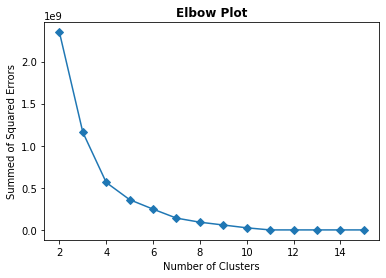

In [26]:
plt.plot(range(2,16), squared_errors, marker='D')
plt.title('Elbow Plot', fontweight='bold')
plt.ylabel('Summed of Squared Errors')
plt.xlabel('Number of Clusters')
plt.show()

- Looking at the Elbow Plot, the ideal number of clusters should be either 3 or 4, as those are the number of clusters where we see that the decrease of variance starts to be smaller and smaller, until such decrease is not really "significant".

In [27]:
# Silhouette score method
from sklearn.metrics import silhouette_score

# List to store the sum of the euclidean distances between the data-points and the centers of the closest 
# cluster
silhouette_scores = []

# Iterating from 2 to up to 15 clusters, fitting everything but the index and predicting the cluster index for
# each sample. Then, add what was described above
for cluster in range(2,16):
    cluster_labels = KMeans(n_clusters=cluster, random_state=40).fit_predict(mall.iloc[:,1:])
    
    silhouette_scores.append(silhouette_score(mall.iloc[:,1:], cluster_labels, metric='euclidean'))
    
    print(f'When there are {cluster} clusters, the silhouette score using the euclidean distance was {silhouette_scores[cluster-2]}')

When there are 2 clusters, the silhouette score using the euclidean distance was 0.6831953459514584
When there are 3 clusters, the silhouette score using the euclidean distance was 0.632873048392413
When there are 4 clusters, the silhouette score using the euclidean distance was 0.6472466865984622
When there are 5 clusters, the silhouette score using the euclidean distance was 0.6795241858519288
When there are 6 clusters, the silhouette score using the euclidean distance was 0.7208789704244036
When there are 7 clusters, the silhouette score using the euclidean distance was 0.7515261386461602
When there are 8 clusters, the silhouette score using the euclidean distance was 0.814395087041046
When there are 9 clusters, the silhouette score using the euclidean distance was 0.8526956022614165
When there are 10 clusters, the silhouette score using the euclidean distance was 0.9325899218245951
When there are 11 clusters, the silhouette score using the euclidean distance was 0.9992565660994203


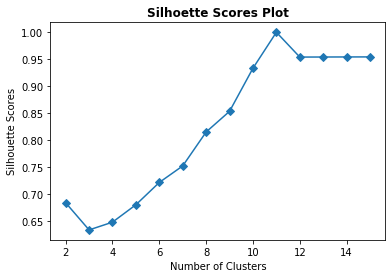

In [28]:
plt.plot(range(2,16), silhouette_scores, marker='D')
plt.title('Silhoette Scores Plot', fontweight='bold')
plt.ylabel('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.show()

- Considering the plot above, the ideal number of clusters is 10, as it is the point where the silhouette scores stop increasing before it starts to overfit.


- However, as these methods yielded different scores, one must be aware of the difficulties of unsupervised learning. Without domain knowledge, the optimal number of clusters can change based on the approach/method selected as different factors come into the equation.

## Question 3 Birds of a feather laugh together

Jester is a research project from the UC Berkeley Laboratory for Automation Science and Engineering. Users are asked to rate the jokes they read and may see more similar jokes. The dataset `jester_dataset.zip`, when unzipped, they are in Excel (.xls) format that contains ratings from 23,500 users who have rated 36 or more jokes. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated"). The text of the jokes is given `jester_dataset_joke_text.zip`. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

In [29]:
jester = pd.read_excel('jester-data-2.xls', header=None)

jester

0      1      2      3      4     5      6     7     8      9    ...  \
0       50  99.00   8.11  99.00  99.00 -2.28  -4.22  5.49 -2.62  99.00  ...   
1      100  -4.37  -3.88   0.73  -3.20 -6.41   1.17  7.82 -4.76  -6.41  ...   
2       42  99.00  99.00  99.00  99.00  0.73  99.00  5.53  3.25  99.00  ...   
3       65   0.34  -6.55   2.86  99.00 -3.64   1.12  5.34  2.33  99.00  ...   
4       37  99.00  99.00  99.00  99.00  9.13  99.00 -9.32 -2.04  99.00  ...   
...    ...    ...    ...    ...    ...   ...    ...   ...   ...    ...  ...   
23495   70  -9.95   4.85  -9.95  -8.25  1.41  -1.75  3.11  3.79  -7.38  ...   
23496  100  -0.78   1.31  -2.09  -0.78  4.71   0.19  3.06 -1.31  -9.76  ...   
23497   51  99.00  99.00  99.00  99.00  6.12  99.00  5.78 -5.53  99.00  ...   
23498  100   1.02   2.77   7.09   0.05  1.26   1.41  2.62  0.49   5.19  ...   
23499   36  99.00  99.00  99.00  99.00  9.17  99.00 -9.90  2.48  99.00  ...   

         91     92     93     94     95     96     97     98     99     100  
0      99.00  99.00  99.00  99.00  99.00  -5.92  99.00  99.00  99.00  99.00  
1       5.73  -6.70   1.99   2.62  -0.49   3.45   3.20  -0.53  -0.53  -2.96  
2      99.00  99.00  99.00  99.00   3.16  99.00  99.00  99.00  99.00  99.00  
3      99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  
4      99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
23495  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  
23496   0.29  -0.92   0.53   2.14   2.48   1.02   2.57   1.02  -0.29   0.78  
23497  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  
23498   7.82   1.07   4.27   3.35   0.63   2.38   2.62   2.57   1.94   3.98  
23499  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  99.00  

[23500 rows x 101 columns]

### Question 3.1 (10 points) 

Build a user-based collaborative filtering and provide a list of top 5 jokes for the first user. Check the text of jokes to see if the recommendations are sensible. 

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

# Create a dictionary which will have the users as keys and the similarity to the first user as the values, 
# according to the cosine similarity
similarity_to_user_0 = {}

for user_id in range(1, jester.shape[0]):
    similarity_to_user_0[user_id] = np.ndarray.item(cosine_similarity(jester.iloc[0,:].values.reshape(1, -1), 
                                                                jester.iloc[user_id,:].values.reshape(1, -1)))

# Transform the dictionary into a dataframe 
similarity_df = pd.DataFrame.from_dict(similarity_to_user_0, orient='Index')

# Change the column name from 0 to Similarity to become more informative
similarity_df.columns = ['Similarity']

# Sort the users according to their similarity in a descending way, to get the most similar users in
# comparison with user 0 in the top, relegating the less similar ones to the bottom of the dataframe
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False)

similarity_df

Similarity
1893     0.961457
7526     0.957772
461      0.947240
15348    0.945249
22279    0.942756
...           ...
13238   -0.420618
15665   -0.425805
21950   -0.427573
22842   -0.427667
21881   -0.429264

[23499 rows x 1 columns]

In [31]:
def top_5_recommendations(top_users):
    
    '''
The top_5_recommendations function takes as a parameter the number of the most similar users to the first one
to compare if the recommendations made by this system are sensitive to the number of people in the
neighborhood. It returns a dataframe with the jokes for the first user based on the number of similar users
taken.
    '''
    
    # Select only the indexes of the top users
    similarity_df_indexes = similarity_df.head(top_users).index
    
    # Create a dictionary that will have the id of the jokes as keys and the corresponding ratings as values.
    # It will be used to create a dataframe with the jokes user 0 has not seen yet and their predicted rating
    predicted_joke_rating = {}
    
    for joke_id in range(1, jester.shape[1]):
        
        # Check if the user has already rated the joke in question. In case it has not, create an entry in the
        # dictionary created above and set the rating to be 0, while creating lists for the weights attributed
        # to similar users and the ratings such users have attributed them
        if jester.iloc[0, joke_id] == 99: 
            
            predicted_joke_rating[joke_id] = 0
            weights = []
            ratings = []

            for user_id in similarity_df_indexes:
                
                # Select only the joke in cause and the similar user in cause
                joke_rating = jester.iloc[user_id, joke_id]
                
                # Check if the user in cause has already rated the joke user 0 has not. In case, this user has
                # already rated the joke, the weight he is given is its similarity value, while the rating is
                # the one he has attributed to the joke
                if joke_rating != 99:
                    weights.append(np.asscalar(similarity_df.loc[similarity_df.index==user_id, 'Similarity']))
                    ratings.append(joke_rating)   
            
            # If no similar user has rated the joke, it cannot be considered
            if len(ratings) > 0:
                
                # With the ratings of the similar users and their similarities considered as weights, it is
                # now possible to infer what would be the rating user 0 would attribute to this joke, based on
                # its similarity with the other users. The predicted rate calculation will be done using a
                # weighted sum of the other user's ratings
                predicted_joke_rating[joke_id] = np.average(ratings, weights=weights)

    # Create the dataframe with the jokes user 0 has not seen/rated yet and corresponding ratings
    predicted_rating_df = pd.DataFrame.from_dict(predicted_joke_rating, orient='Index')
    
    # Change the column name from 0 to Rating to become more informative
    predicted_rating_df.columns = ['Rating']
    
    # Return the dataframe sorted by the rating with only the top 5 results
    return predicted_rating_df.sort_values(by='Rating', ascending=False).head(5)

from bs4 import BeautifulSoup

def show_jokes_3_1(df):
    
    '''
The show_jokes_3_1 function takes a parameter (df) one dataframe resulting from the top_5_recommendation
function, from which it will grab the index of the recommended jokes, so that they are printed.
    '''
    
    for index, row in df.iterrows():
        print(f'This is Joke #{index}')
        file = 'init'+str(index)+'.html'
        soup = BeautifulSoup(open(file), "html.parser")
        print(soup.text)

In [32]:
top_5_recommendations_500 = top_5_recommendations(500)
top_5_recommendations_500

Rating
1   4.253753
72  3.591701
76  3.283697
88  3.160574
98  3.026519

In [33]:
show_jokes_3_1(top_5_recommendations_500)

This is Joke #1


Joke 1 of 25





 

A man visits the doctor. The doctor says "I have bad news for you.You have
cancer and Alzheimer's disease". 
The man replies "Well,thank God I don't have cancer!"






This is Joke #72


 A Joke 







 

On the first day of college, the Dean addressed the students,
pointing out some of the rules:

"The female dormitory will be out-of-bounds for all male students
and the male dormitory to the female students. Anybody caught breaking
this rule will be finded $20 the first time." He continued, "Anybody 
caught breaking this rule the second time will be fined $60. Being caught
a third time will cost you a fine of $180. Are there any questions ?"

At this point, a male student in the crowd inquired:
"How much for a season pass ?"







This is Joke #76


 A Joke 







 

There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  
were completely destroyed, buy fortunately, no one  was   hurt.  In thankfulnes

In [34]:
top_5_recommendations_100 = top_5_recommendations(100)
top_5_recommendations_100

Rating
98  5.532911
90  5.194050
73  3.674970
94  3.235461
95  3.213670

In [35]:
show_jokes_3_1(top_5_recommendations_100)

This is Joke #98


 A Joke 







 

Age and Womanhood

1. Between the ages of 13 and 18 ...
    She is like Africa, virgin and unexplored.

2. Between the ages of 19 and 35 ...
    She is like Asia, hot and exotic.

3. Between the ages of 36 and 45 ...
    She is like America, fully explored, breathtakingly beautiful,and free with her resources.

4. Between the ages of 46 and 56 ...
    She is like Europe, exhausted but still has points of interest.

5. After 56 she is like Australia ...
    Everybody knows it's down there, but who gives a damn?







This is Joke #90


 A Joke 







 

Q: How many programmers does it take to change a lightbulb?

A: NONE!   That's a hardware problem....







This is Joke #73


 A Joke 







 

Q: What is the difference between George  Washington, Richard Nixon,
and Bill Clinton?

A: Washington couldn't tell a lie, Nixon couldn't   tell the truth, and
Clinton doesn't know the difference.







This is Joke #94


 A Joke 







 

Two atoms ar

- As it is possible to see just by changing the value from 500 to 100 users, the recommended jokes were changed as well
- In terms of the text, it appears it is somehow sensible, as we can see common topics within the pool of similar users. That is, when there are 500 similar users, the overlapping topics are ones, while when there 100, the overlapping topics are another.

### Question 3.2 (10 points) 

Build a item-based collaborative filtering and provide a list of top 5 jokes for the first user. Check the text of jokes to see if the recommendations are sensible.

In [36]:
# As there are 101 jokes, it is necessary to create 2 arrays with 100 zeros (instantiation phase) which will be
# used as the ratings of each joke and the weight that will be given to them in order to find the best jokes to
# be recommended to user 0

rating = np.zeros(100)
weights = np.zeros(100)

for joke in range(1, jester.shape[1]):
    
    # Create a list to store the similatiry scores (according to the cosine similarity) between the jokes
    joke_similarity = []
    
    for joke_2 in range(1, jester.shape[1]):
        
        # Calculate the cosine similarity between jokes
        similarity = np.ndarray.item(cosine_similarity(jester.iloc[:,joke].values.reshape(1, -1), 
                                                       jester.iloc[:,joke_2].values.reshape(1, -1)))
        
        # Store the value calculated in the list
        joke_similarity.append(similarity)
    
    # In order to calculate the rating of each joke and associated weight. The 10 most similar jokes will be
    # the selected ones to perform such calculations but a different value can be chosen. The after being
    # sorted, if the slice was [0:10], the first element of cosine would be 1, so the slice is [1:11].
    joke_index = np.argsort(joke_similarity)[::-1][1:11] # index of the jokes
    cosine = np.array(joke_similarity)[joke_index] # matching cosine similarity

    # Then, the focus must be only the first user (user 0) and on the jokes that were rated 
    if jester.iloc[0, joke] != 99:
        
        # index is the index of the joke_index (from 0 to 9); value is the value stored in joke_index, which is
        # the actual index of the jokes
        for index, value in enumerate(joke_index):
            
            # The rating of each joke is calculated as the rating user 0 has given the joke in cause
            # multiplied by the similarity value
            rating[value] += jester.iloc[0,joke] * cosine[index]
            
            # The weight of each joke is the sum of the similarity value whenever it appears
            weights[value] += cosine[index]

In [37]:
print('Jokes\' Ratings Array')
rating

Jokes' Ratings Array


array([ -0.95922932,  -5.7910109 ,  -5.79996391,  -0.87210791,
        -1.09984947,   6.49826277,  -4.28798284,  -4.50197087,
        -0.97629996,  -5.35869681,   5.79638368,  -4.53781861,
        -3.19222742,   0.49912615,  -4.73519737,  -3.71655468,
        -5.04468575,  -4.08883501,  -1.68111379,  -2.05900836,
         9.85545922,  -4.41020314,   5.34345313,  -1.3071031 ,
        -7.22234943,   2.22150733,   1.44147234,   0.        ,
         5.96192563,  -8.26910231,   2.92949984,   9.80052624,
        -8.13037257,  -1.87657777,   8.08087138,  12.99854666,
        -7.57339767,   0.        ,  -1.48840543,   1.97432795,
        -2.59842672,   1.62853423,   6.39596127,   0.        ,
        -2.85012935,  -3.08319052,   1.81503561,   0.        ,
         8.14283946,   4.15047298,   2.35391261,  -2.73849251,
         5.45450045,  -4.97149653, -12.55836839,  -0.21442324,
         0.        ,   0.        ,   3.32397362,   6.4169049 ,
         0.03522406,   1.83257794,  -1.12136863,  -7.49

In [38]:
print('Jokes\' Weights Array')
weights

Jokes' Weights Array


array([ 2.56213088,  6.6817681 ,  4.8177447 ,  1.73448881,  1.91511563,
        8.53387966,  2.30829152,  1.9743477 ,  1.73086793,  9.56605972,
        2.98322863,  4.70821439,  1.80666304,  4.1241462 ,  2.00607651,
        2.03264442,  1.89752285,  2.29870868,  2.07729595,  2.55331173,
        4.46359633,  5.25494724,  9.37621164,  2.48433855,  7.53047099,
        0.31332967,  2.10947959,  0.        ,  4.92617877, 10.24598041,
        1.52050447,  6.38631876,  3.28821776,  1.65183714,  7.08370924,
        6.9445477 ,  0.84808485,  0.        ,  0.31600964,  1.65843482,
        2.2104807 ,  0.28421191,  1.60490325,  0.        ,  2.35293016,
        0.71115266,  0.24265182,  0.        ,  7.74098447,  7.65376201,
        5.63930417,  7.35141728,  6.2763304 ,  0.66305347,  3.89191201,
        1.08712465,  0.        ,  0.        ,  2.04999401,  1.60346075,
        1.21459579,  6.68425661,  3.02198664,  0.83915317,  0.91764266,
        3.10783503,  1.63561302,  3.51030653,  2.93622375,  3.45

In [39]:
from math import isnan

# To predict the ratings of each joke, the array with the ratings of each joke is divided by the corresponding
# weights
predicted_joke_rating = rating/weights

# Sort the user ratings in a descending order (as there are weights = 0, these will be turn into nans)
sort = np.argsort(predicted_joke_rating)[::-1]

# List to store the 5 jokes with the highest predicted ratings
recommendation = []

for element in sort:
    if len(recommendation) < 5: # Guarantee there are only 5 jokes
        if isnan(predicted_joke_rating[element]) != True:
            recommendation.append(element) # Store the jokes in the recommendation list
            
print(recommendation)

[46, 25, 64, 41, 77]


In [40]:
for joke in recommendation:
    print(f'This is Joke #{joke}')
    file = 'init'+str(joke)+'.html'
    soup = BeautifulSoup(open(file), "html.parser")
    print(soup.text)

This is Joke #46


 A Joke 



 


  

A couple has been married for 75 years. For the husband's 95th
birthday, his wife decides to surprise him by hiring a prostitute.
That day, the doorbell rings. The husband uses his walker to get to
the door and opens it. 
A 21-year-old in a latex outfit smiles and
says, "Hi, I here to give you super sex!" 
The old man says, "I'll take the soup."








This is Joke #25


Joke 25




 

  

Two kindergarten girls were talking outside: one said, "You
won't believe what I saw on the patio yesterday--a condom!"

The second girl asked, "What's a patio?"







This is Joke #64


 A Joke 



 


  

What is the rallying cry of the International Dyslexic Pride movement?
Dyslexics Untie!








This is Joke #41


 A Joke 



 


  

What does an atheist say during an orgasm?
"Oh Darwin! Oh Darwin!..."








This is Joke #77


 A Joke 







 

If pro- is the opposite of con- then congress must be the opposite
of progress.









- Looking at the text of the recommended jokes, there are, again, common topics across jokes, which makes me believe it is somehow sensitive to the topic of the jokes in question.

### Question 3.3 (20 points) 

Now build a recommendation system using matrix factorization (singular value decomposition). Get a list of top 5 jokes for the first user. Explain whether model-based recoomendation approach is better than neighborhood-based approach. Write a function that takes the parameter of user_id and return the text of recommended jokes)

In [41]:
# In order to perform svd, it is necessary to substitute the 99s (values of the unrated jokes) with 0s
jester_1 = jester.replace(99, 0)

# Although using np.linalg.svd made the kernel die, so I found that this function worked just fine so I used 
# it instead of the numpy version
from scipy.sparse.linalg import svds

# The matrices returned by svds are presented below and they are needed to obtain the predicted ratings for
# the jokes
    # u: "Unitary matrix having left singular vectors as columns"
    # s: "The singular values"
    # vt: "Unitary matrix having right singular vectors as rows"

# Consider only the jokes' ratings
u, s, vt = svds(jester_1.iloc[:, 1:].values)

# Getting the diagonal of the s matrix
s = np.diag(s)

# Multiplying all the matrices, first u by s. Then, multiplying the resulting matrix by vt
predictions = np.dot(np.dot(u, s), vt)

predictions

array([[-0.31102489, -0.59592341, -0.67097327, ..., -0.08835398,
        -0.30737586, -0.28091582],
       [-1.06461064, -3.45325536, -2.02458656, ..., -0.95756321,
         0.62005776, -1.38749116],
       [ 0.08635207,  0.38356961, -0.04375282, ...,  0.38421878,
         0.22467062,  0.22242633],
       ...,
       [-0.7743065 ,  0.76782836,  0.4209517 , ...,  1.24182574,
         0.61363621,  1.2594025 ],
       [ 3.56424999,  3.04498076,  2.69132364, ...,  3.36655995,
         2.70406377,  3.21582502],
       [ 1.73605463,  1.23262359,  0.71734723, ..., -0.06683047,
        -0.28578243, -0.12483525]])

In [42]:
predictions.shape

(23500, 100)

Looking at the results from predictions.shape, the structure from the jester dataset holds, except that the first column was dropped

In [43]:
# List to store the recommended jokes
recommendation_2 = []

# Loop through the descending sorted joke indexes for the first user 
for index_joke in np.argsort(predictions[0])[::-1]:
    
    # Ignore jokes that were rated by the user, thus selecting the ones with a rating of 0 (previously 99)
    if jester_1.iloc[0, index_joke] == 0:
        
        # Store the jokes accordingly to their predicted rating
        recommendation_2.append(index_joke)

# The top 5 recommendations will be printed
print(recommendation_2[:5])

[67, 34, 52, 60, 64]


- Considering the time it took to train the neighborhood-based models and the model-based model, it seems natural that the latter approach should be the one chosen, especially when the datasets become larger and larger

In [44]:
from bs4 import BeautifulSoup

def show_top_5_jokes(user_id):
    
    '''
The show_top_5_jokes takes the user_id as a parameter and shows the text of top 5 jokes for the user in cause.
Furthermore, it does not work if the user has seen all the jokes and it shows less than 5 jokes if the user
has seen more than 95 jokes.
    '''
    
    if jester_1[0][user_id] == 100:
        print('We have no more jokes to show you, you have seen them all!')
    
    else:
        # List to store the recommended jokes
        user_recommendation = []

        # Loop through the descending sorted joke indexes for the first user 
        for index_joke in np.argsort(predictions[user_id])[::-1]:

            # Ignore jokes that were rated by the user, thus selecting the ones with a rating of 0 (previously 99)
            if jester_1.iloc[user_id, index_joke] == 0:

                # Store the jokes accordingly to their predicted rating
                user_recommendation.append(index_joke)

        # Top 5 recommendations
        for top in user_recommendation[:5]:
            file = 'init'+str(top)+'.html'
            soup = BeautifulSoup(open(file), "html.parser")
            print(soup.text)

In [45]:
show_top_5_jokes(9415)



 A Joke 







 

At a recent Sacramento PC Users Group meeting,
a company was demonstrating its latest speech-
recognition software.   A representative from the
company was just about ready to start the
demonstration and asked everyone in the room
to quiet down.

Just then someone in the back of the room yelled,
"Format C: Return."

Someone else chimed in:
"Yes, Return"

Unfortunately, the software worked.










 A Joke 







 

On the first day of college, the Dean addressed the students,
pointing out some of the rules:

"The female dormitory will be out-of-bounds for all male students
and the male dormitory to the female students. Anybody caught breaking
this rule will be finded $20 the first time." He continued, "Anybody 
caught breaking this rule the second time will be fined $60. Being caught
a third time will cost you a fine of $180. Are there any questions ?"

At this point, a male student in the crowd inquired:
"How much for a season pass ?"









In [46]:
show_top_5_jokes(0)



 A Joke 



 


  

Once upon a time, two brooms fell in love and decided to get married.
Before the ceremony, the bride broom informed the groom broom that 
she was expecting a little whiskbroom. The groom broom was aghast!

"How is this possible?" he asked. "We've never swept together!










Joke 34



 



  

Out in the backwoods of some midwestern state, little Johnny arrives
at school an hour late.

Teacher: "Why are you so late, John?"
Johny : "My big brother got shot in the ass."
(the teacher corrects his speech)
Teacher: "Rectum."
Johnny : "Wrecked him!? Hell, It damn near killed him!" 








 A Joke 



 


  

Q: What do Monica Lewinsky and Bob Dole have in common?
A: They were both upset when Bill finished first.










 A Joke 



 


  

What did the Buddhist say to the hot dog vendor?
Make me one with everything.










 A Joke 



 


  

What is the rallying cry of the International Dyslexic Pride movement?
Dyslexics Untie!










In [47]:
show_top_5_jokes(1)

We have no more jokes to show you, you have seen them all!
